In [36]:
import pickle
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pathlib import Path
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import GaiaG, GaiaRP, GaiaBP
import matplotlib
%matplotlib inline

# Load the pickle files
with open("scr_mk27/data/tz_fornacis_data_eclipses_100000.pkl", "rb") as f:
    data_ec = pickle.load(f)

In [37]:
import astropy.units as u
(75.6*u.d).to(u.year).value

0.20698151950718685

In [38]:
from spice.spectrum.filter import Bolometric

gaia_g = GaiaG()
gaia_rp = GaiaRP()
gaia_bp = GaiaBP()

In [39]:
times_ec = data_ec['times']
spectra1_ec = data_ec['spectra_body1']
spectra2_ec = data_ec['spectra_body2']
wavelengths_ec = data_ec['wavelengths']

In [40]:
offset = 10
gaia_g_mag = [AB_passband_luminosity(gaia_g, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
         for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
gaia_rp_mag = [AB_passband_luminosity(gaia_rp, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
gaia_bp_mag = [AB_passband_luminosity(gaia_bp, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
times_ec = data_ec['times'][offset:]

In [41]:
# Define the period for the calculation (in days), e.g. orbital period
period = 0.20698151950718685  # replace with the correct period for TZ Fornacis

# Define a reference epoch (e.g. time of primary eclipse); use the first time as a default
t0 = times_ec[0]

# Calculate phase for each time
phases = ((times_ec - t0) / period) % 1

In [42]:
br = np.array(gaia_bp_mag) - np.array(gaia_rp_mag)

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/jobfs/154389465.gadi-pbs/ipykernel_577204/597405205.py:6: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_ylabel('$\Delta$ Gaia G [mag]')


Text(0.5, 0, 'Phase')

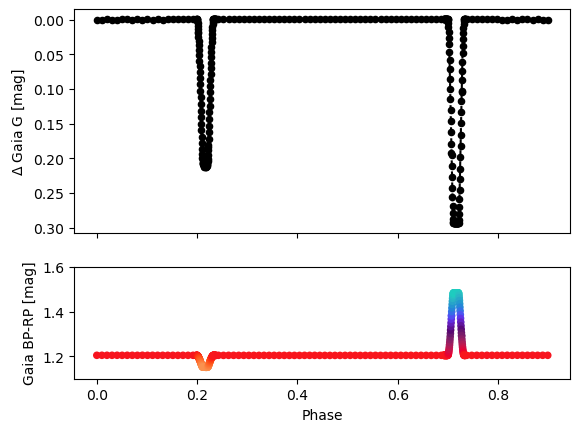

In [52]:
import cmasher as cmr
fig, ax = plt.subplots(2, 1, sharex=True, height_ratios=[3, 1.5])
ax[0].scatter(phases, np.array(gaia_g_mag)-gaia_g_mag[0], color='black', s=20)
ax[0].plot(phases, np.array(gaia_g_mag)-gaia_g_mag[0], linestyle='--', color='black')
ax[0].invert_yaxis()
ax[0].set_ylabel('$\Delta$ Gaia G [mag]')
ax[1].scatter(phases, br, c=br, cmap='cmr.guppy', s=20, zorder=2);
ax[1].set_ylim(1.1, 1.6)
ax[1].plot(phases, br, linestyle='--', color='black', zorder=1);
ax[1].set_ylabel('Gaia BP-RP [mag]')
ax[1].set_xlabel('Phase')

In [53]:
fig.savefig('tz_fornacis_lightcurve.png', dpi=300, bbox_inches='tight')